#  Аварии на шахтах

In [1]:
import numpy as np
import pandas as pd
from math import exp
from math import factorial

import scipy.stats as sts
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [2]:
df = pd.read_csv("data/coals.csv", index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий.

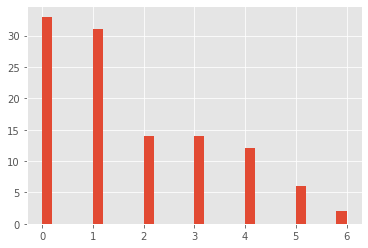

In [3]:
df['count'].hist(bins=30);

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [4]:
# число наблюдений 
n_hat = df.shape[0]

# ваша оценка метода моментов
lam_hat = np.mean(df['count'])
print(f'{n_hat}; {lam_hat}')

112; 1.7053571428571428


__б) Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый. Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка. 

In [5]:
# your code here
lam_se = np.sqrt(lam_hat/n_hat)
lam_se

0.1233953121525469

__в) Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [6]:
# your code here
alpha = 0.1

q = stats.norm.ppf(1 - alpha/2)

left = lam_hat - q * lam_se
right = lam_hat + q * lam_se
delta = right - left

print(f"Доверительный интервал [{left:.6}, {right:.6}] ширины {delta:.6}")

Доверительный интервал [1.50239, 1.90832] ширины 0.405934


__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [7]:
# your code here
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

alpha = 0.05
q = stats.norm.ppf(1 - alpha/2)

diff = np.mean(x) - np.mean(y)
diff_se = np.sqrt(np.mean(x)/x.size + np.mean(y)/y.size)

left = diff - q * diff_se
right = diff + q * diff_se
delta = right - left

print(f"Доверительный интервал [{left:.6}, {right:.6}] ширины {delta:.6}")

Доверительный интервал [1.28355, 2.31] ширины 1.02645


Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

__д) Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [8]:
def poiss_prob(k):
    return (lam_hat ** k / factorial(k)) * exp(-lam_hat)

print(poiss_prob(1))

0.3098761473208731
